# CS 545 Homework III (Made By Oğulcan Emre Örsel)

Let's import the libraries

In [1]:
import os
import math
import random

import numpy as np
from numpy import linalg
from numpy import inf
import scipy
import scipy.io
from scipy.io import wavfile
from scipy import signal
from scipy.fft import fftshift

import matplotlib.pyplot as plt

from scipy.sparse.csgraph import floyd_warshall
from scipy.spatial.distance import cdist
from scipy.sparse import csr_matrix
from scipy.signal import stft
from scipy.stats import multivariate_normal
from scipy.io.wavfile import read as wavread
from scipy import signal
from scipy.fftpack import fft, fftfreq, ifft

from sklearn.datasets import load_sample_image
from sklearn.feature_extraction.image import extract_patches_2d
from sklearn.model_selection import train_test_split

from PIL import Image

Defining Functions

In [2]:
def discriminant(x, y,nu_x,nu_y,sigma_x,sigma_y):
    
    g=0.5*((-x*x/sigma_x)+(-y*y/sigma_y)+(2*nu_x*x/sigma_x)+(2*nu_y*y/sigma_x)+(-nu_x*nu_x/sigma_x)+(-nu_y*nu_y/sigma_y))
    
    return g

def gaussian(g,nu_x,nu_y,sigma_x,sigma_y):

    N=np.exp(g)/(2*np.pi*np.sqrt(sigma_x+sigma_y))
    
    return N


# PART I

Problem I.(a)

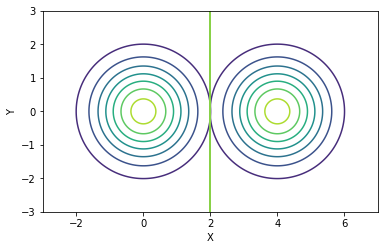

In [3]:
x = np.linspace(-5, 7.5,num=1000)
y = np.linspace(-5, 5, num=1000)
xx, yy = np.meshgrid(x, y, sparse=True)

nu_1=[0,0]
C_1=np.zeros([2,2])
C_1[0,0]=1
C_1[1,1]=1

nu_2=[4,0]
C_2=np.zeros([2,2])
C_2[0,0]=1
C_2[1,1]=1

g_1=discriminant(xx,yy,nu_1[0],nu_1[1],C_1[0,0],C_1[1,1])
N_1=gaussian(g_1,nu_1[0],nu_1[1],C_1[0,0],C_1[1,1])

g_2=discriminant(xx,yy,nu_2[0],nu_2[1],C_2[0,0],C_2[1,1])
N_2=gaussian(g_2,nu_2[0],nu_2[1],C_2[0,0],C_2[1,1])


min_val=np.min(abs(g_1-g_2))
g_1-g_2<=2*min_val

decision_boundary=g_1-g_2<=2*min_val


plt.xlim([-3,6])
plt.contour(x, y, N_1)
plt.contour(x, y, N_2)
plt.contour(x, y, decision_boundary)
#plt.contourf(x, y, g_1-g_2)
plt.axis('scaled')
plt.xlim([-3, 7])
plt.ylim([-3, 3])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Problem I.(b)

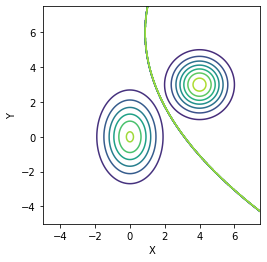

In [4]:
x = np.linspace(-5, 7.5,num=1000)
y = np.linspace(-5, 7.5, num=1000)
xx, yy = np.meshgrid(x, y, sparse=True)

nu_1=[0,0]
C_1=np.zeros([2,2])
C_1[0,0]=1
C_1[1,1]=2

nu_2=[4,3]
C_2=np.zeros([2,2])
C_2[0,0]=1
C_2[1,1]=1

g_1=discriminant(xx,yy,nu_1[0],nu_1[1],C_1[0,0],C_1[1,1])
N_1=gaussian(g_1,nu_1[0],nu_1[1],C_1[0,0],C_1[1,1])

g_2=discriminant(xx,yy,nu_2[0],nu_2[1],C_2[0,0],C_2[1,1])
N_2=gaussian(g_2,nu_2[0],nu_2[1],C_2[0,0],C_2[1,1])


min_val=np.min(abs(g_1-g_2))
g_1-g_2<=2*min_val

decision_boundary=g_1-g_2<=2*min_val


plt.xlim([-3,6])
plt.contour(x, y, N_1)
plt.contour(x, y, N_2)
plt.contour(x, y, decision_boundary)
#plt.contourf(x, y, g_1-g_2)
plt.axis('scaled')
#plt.xlim([-3, 7])
#plt.ylim([-3, 3])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Problem I.(c)

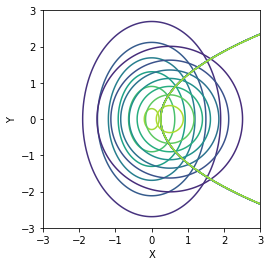

In [5]:
x = np.linspace(-3, 3,num=1000)
y = np.linspace(-3, 3, num=1000)
xx, yy = np.meshgrid(x, y, sparse=True)

nu_1=[0,0]
C_1=np.zeros([2,2])
C_1[0,0]=1
C_1[1,1]=2

nu_2=[0.5,0]
C_2=np.zeros([2,2])
C_2[0,0]=1
C_2[1,1]=1

g_1=discriminant(xx,yy,nu_1[0],nu_1[1],C_1[0,0],C_1[1,1])
N_1=gaussian(g_1,nu_1[0],nu_1[1],C_1[0,0],C_1[1,1])

g_2=discriminant(xx,yy,nu_2[0],nu_2[1],C_2[0,0],C_2[1,1])
N_2=gaussian(g_2,nu_2[0],nu_2[1],C_2[0,0],C_2[1,1])


min_val=np.min(abs(g_1-g_2))
g_1-g_2<=2*min_val

decision_boundary=g_1-g_2<=1.5*min_val


plt.xlim([-3,6])
plt.contour(x, y, N_1)
plt.contour(x, y, N_2)
plt.contour(x, y, decision_boundary)
#plt.contourf(x, y, g_1-g_2)
plt.axis('scaled')
#plt.xlim([-3, 7])
#plt.ylim([-3, 3])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Problem I.(d)

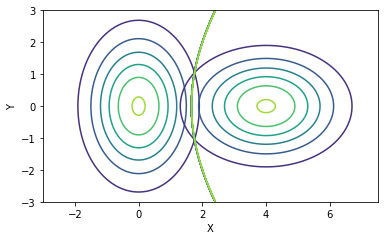

In [6]:
x = np.linspace(-3, 7.5,num=1000)
y = np.linspace(-3, 3, num=1000)
xx, yy = np.meshgrid(x, y, sparse=True)

nu_1=[0,0]
C_1=np.zeros([2,2])
C_1[0,0]=1
C_1[1,1]=2

nu_2=[4,0]
C_2=np.zeros([2,2])
C_2[0,0]=2
C_2[1,1]=1

g_1=discriminant(xx,yy,nu_1[0],nu_1[1],C_1[0,0],C_1[1,1])
N_1=gaussian(g_1,nu_1[0],nu_1[1],C_1[0,0],C_1[1,1])

g_2=discriminant(xx,yy,nu_2[0],nu_2[1],C_2[0,0],C_2[1,1])
N_2=gaussian(g_2,nu_2[0],nu_2[1],C_2[0,0],C_2[1,1])


min_val=np.min(abs(g_1-g_2))
g_1-g_2<=2*min_val

decision_boundary=g_1-g_2<=1.5*min_val


plt.xlim([-3,6])
plt.contour(x, y, N_1)
plt.contour(x, y, N_2)
plt.contour(x, y, decision_boundary)
#plt.contourf(x, y, g_1-g_2)
plt.axis('scaled')
#plt.xlim([-3, 7])
#plt.ylim([-3, 3])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# PART II
# Problem 2

Let's plot a test image

In [7]:
dfile = "digits-labels.npz"
digits = np.load(dfile)["d"]
labels = np.load(dfile)["l"]

train_data=np.zeros([np.shape(digits)[0],1000])

We then randomly select the samples from our data set


In [8]:
test_index=np.zeros([10,2])

for i  in range (0,10):
    class_digit=digits[:,labels==i]
    digit_begin=int(random.randint(0,int(np.shape(class_digit)[1]*0.9)))
    digit_end=int(digit_begin+100)
    train_data[:,(i*100):(i+1)*100]=class_digit[:,digit_begin:digit_end]
    test_index[i,:]=[digit_begin,digit_end]
    

Writing functions

In [9]:
def PCA_weights(X,num_components):
    
    cov_mat = np.cov(X)
     
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
     
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
    eigenvalue_subset = np.sqrt(sorted_eigenvalue[0:num_components])

    eigenvalue_subset_matrix=np.eye(np.shape(eigenvalue_subset)[0])*eigenvalue_subset
    W=np.matmul(linalg.inv(eigenvalue_subset_matrix),eigenvector_subset.T)
    
    return W, eigenvector_subset, eigenvalue_subset



In [10]:
def gaussian_classifier_trainer(train_data,reduced_dim,digit_class,num_samples):
    
    #reduced_dim=5
    #digit_class=10
    #num_samples=100
    
    mean=np.zeros([reduced_dim,digit_class])
    Cov=np.zeros([reduced_dim,reduced_dim,digit_class])
    Prob=np.zeros([digit_class,1])

    W_digits_PCA,v_digits_PCA,w_digits_PCA=PCA_weights(train_data,reduced_dim)
    digits_PCA=np.matmul(W_digits_PCA,train_data)


    for j in range (0,digit_class):
        Cov[:,:,j]=np.cov(digits_PCA[:,j*num_samples:(j+1)*num_samples])
        for i in range (0,reduced_dim):
            mean[i,j]=np.sum(digits_PCA[i,j*num_samples:(j+1)*num_samples])/num_samples

    return W_digits_PCA, mean, Cov

def gaussian_classifier(input_image,W_digits_PCA, mean, Cov):
    
    input_PCA=np.matmul(W_digits_PCA,input_image)
    Prob=np.zeros([10,1])        
 
    Prob[0] = multivariate_normal.pdf(input_PCA, mean[:,0], Cov[:,:,0])
    Prob[1] = multivariate_normal.pdf(input_PCA, mean[:,1], Cov[:,:,1])
    Prob[2] = multivariate_normal.pdf(input_PCA, mean[:,2], Cov[:,:,2])
    Prob[3] = multivariate_normal.pdf(input_PCA, mean[:,3], Cov[:,:,3])
    Prob[4] = multivariate_normal.pdf(input_PCA, mean[:,4], Cov[:,:,4])
    Prob[5] = multivariate_normal.pdf(input_PCA, mean[:,5], Cov[:,:,5])
    Prob[6] = multivariate_normal.pdf(input_PCA, mean[:,6], Cov[:,:,6])
    Prob[7] = multivariate_normal.pdf(input_PCA, mean[:,7], Cov[:,:,7])
    Prob[8] = multivariate_normal.pdf(input_PCA, mean[:,8], Cov[:,:,8])
    Prob[9] = multivariate_normal.pdf(input_PCA, mean[:,9], Cov[:,:,9])
    
    Classification=np.argmax(Prob)

    return Classification

Testing with 5 dimensions

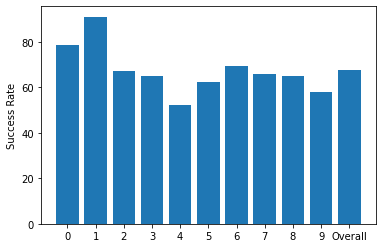

In [11]:
reduced_dim=5
#digit_class=10
#num_samples=100

[W_digits_PCA, mean, Cov]=gaussian_classifier_trainer(train_data,reduced_dim,10,100)

dimensions=np.zeros([10,1])
for i in range(0,10):
    dimensions[i]=np.shape(digits[:,labels==i])[1]-100

test=np.zeros([reduced_dim,int(np.max(dimensions))])

Classification=np.zeros([int(np.max(dimensions)),10])



for j in range (0,10):
    removed=np.arange(int(test_index[j,0]),int(test_index[j,1]), 1)
    test=np.delete(digits[:,labels==j][:,:], removed,1)
    for i in range (0,np.shape(test)[1]-1):
        Classification[i,j]=gaussian_classifier(test[:,i],W_digits_PCA, mean, Cov)
    
Success=np.zeros([11,1])

for i in range (0,10):
    Success[i]=np.sum((Classification[1:int(dimensions[i]),i]==i)*1)/int(dimensions[i])

Success[10]=np.sum(Success[0:10])/10

langs = ['0', '1', '2', '3', '4','5','6','7','8','9','Overall']
plt.bar(langs,Success[:,0]*100)
plt.ylabel('Success Rate')
plt.show()

Testing with 10 dimensions

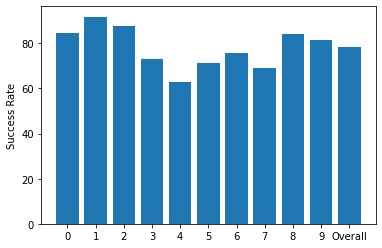

In [12]:
reduced_dim=10
#digit_class=10
#num_samples=100

[W_digits_PCA, mean, Cov]=gaussian_classifier_trainer(train_data,reduced_dim,10,100)

dimensions=np.zeros([10,1])
for i in range(0,10):
    dimensions[i]=np.shape(digits[:,labels==i])[1]-100

test=np.zeros([reduced_dim,int(np.max(dimensions))])

Classification=np.zeros([int(np.max(dimensions)),10])



for j in range (0,10):
    removed=np.arange(int(test_index[j,0]),int(test_index[j,1]), 1)
    test=np.delete(digits[:,labels==j][:,:], removed,1)
    for i in range (0,np.shape(test)[1]-1):
        Classification[i,j]=gaussian_classifier(test[:,i],W_digits_PCA, mean, Cov)
    
Success=np.zeros([11,1])

for i in range (0,10):
    Success[i]=np.sum((Classification[1:int(dimensions[i]),i]==i)*1)/int(dimensions[i])

Success[10]=np.sum(Success[0:10])/10

langs = ['0', '1', '2', '3', '4','5','6','7','8','9','Overall']
plt.bar(langs,Success[:,0]*100)
plt.ylabel('Success Rate')
plt.show()

Testing with 20 dimensions

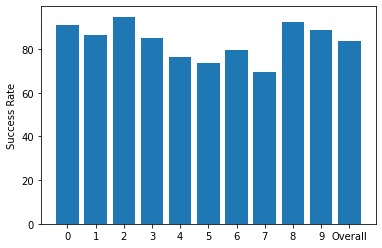

In [13]:
reduced_dim=20
#digit_class=10
#num_samples=100

[W_digits_PCA, mean, Cov]=gaussian_classifier_trainer(train_data,reduced_dim,10,100)

dimensions=np.zeros([10,1])
for i in range(0,10):
    dimensions[i]=np.shape(digits[:,labels==i])[1]-100

test=np.zeros([reduced_dim,int(np.max(dimensions))])

Classification=np.zeros([int(np.max(dimensions)),10])



for j in range (0,10):
    removed=np.arange(int(test_index[j,0]),int(test_index[j,1]), 1)
    test=np.delete(digits[:,labels==j][:,:], removed,1)
    for i in range (0,np.shape(test)[1]-1):
        Classification[i,j]=gaussian_classifier(test[:,i],W_digits_PCA, mean, Cov)
    
Success=np.zeros([11,1])

for i in range (0,10):
    Success[i]=np.sum((Classification[1:int(dimensions[i]),i]==i)*1)/int(dimensions[i])

Success[10]=np.sum(Success[0:10])/10

langs = ['0', '1', '2', '3', '4','5','6','7','8','9','Overall']
plt.bar(langs,Success[:,0]*100)
plt.ylabel('Success Rate')
plt.show()

Testing with 30 dimensions


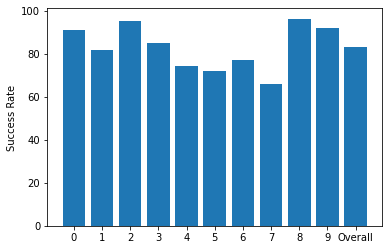

In [14]:
reduced_dim=30
#digit_class=10
#num_samples=100

[W_digits_PCA, mean, Cov]=gaussian_classifier_trainer(train_data,reduced_dim,10,100)

dimensions=np.zeros([10,1])
for i in range(0,10):
    dimensions[i]=np.shape(digits[:,labels==i])[1]-100

test=np.zeros([reduced_dim,int(np.max(dimensions))])

Classification=np.zeros([int(np.max(dimensions)),10])



for j in range (0,10):
    removed=np.arange(int(test_index[j,0]),int(test_index[j,1]), 1)
    test=np.delete(digits[:,labels==j][:,:], removed,1)
    for i in range (0,np.shape(test)[1]-1):
        Classification[i,j]=gaussian_classifier(test[:,i],W_digits_PCA, mean, Cov)
    
Success=np.zeros([11,1])

for i in range (0,10):
    Success[i]=np.sum((Classification[1:int(dimensions[i]),i]==i)*1)/int(dimensions[i])

Success[10]=np.sum(Success[0:10])/10

langs = ['0', '1', '2', '3', '4','5','6','7','8','9','Overall']
plt.bar(langs,Success[:,0]*100)
plt.ylabel('Success Rate')
plt.show()

Another random initialization for 30 dimensions

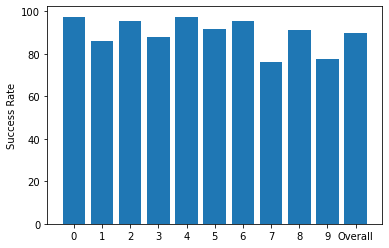

In [17]:
test_index=np.zeros([10,2])

for i  in range (0,10):
    class_digit=digits[:,labels==i]
    digit_begin=int(random.randint(0,int(np.shape(class_digit)[1]*0.9)))
    digit_end=int(digit_begin+100)
    train_data[:,(i*100):(i+1)*100]=class_digit[:,digit_begin:digit_end]
    test_index[i,:]=[digit_begin,digit_end]

reduced_dim=30
#digit_class=10
#num_samples=100

[W_digits_PCA, mean, Cov]=gaussian_classifier_trainer(train_data,reduced_dim,10,100)

dimensions=np.zeros([10,1])
for i in range(0,10):
    dimensions[i]=np.shape(digits[:,labels==i])[1]-100

test=np.zeros([reduced_dim,int(np.max(dimensions))])

Classification=np.zeros([int(np.max(dimensions)),10])



for j in range (0,10):
    removed=np.arange(int(test_index[j,0]),int(test_index[j,1]), 1)
    test=np.delete(digits[:,labels==j][:,:], removed,1)
    for i in range (0,np.shape(test)[1]-1):
        Classification[i,j]=gaussian_classifier(test[:,i],W_digits_PCA, mean, Cov)
    
Success=np.zeros([11,1])

for i in range (0,10):
    Success[i]=np.sum((Classification[1:int(dimensions[i]),i]==i)*1)/int(dimensions[i])

Success[10]=np.sum(Success[0:10])/10

langs = ['0', '1', '2', '3', '4','5','6','7','8','9','Overall']
plt.bar(langs,Success[:,0]*100)
plt.ylabel('Success Rate')
plt.show()

From the above examples, we observe that the overall performance of the classifier is increasing with higher dimensions indicating that compression to very few dimensions increase the error rate (after 30dimensions we reach 90 % success rate). Additionally, we see that the training data also plays an important factor (not major as the compression dimension) for the classifier performance. So, the training data should be chosen carefully as well

# Problem 3

Importing data

In [18]:
root_path = 'C:/Users/Ogulcan/Desktop/CS 545/Homeworks/HW_3/music' # Change current path to the desired one
subject_name = 'vl1'
full_path = '%s' % (root_path)
os.chdir(root_path)
    
window_size=1024
Sxx_speech=np.zeros([513, 1293,60])
Sxx_music=np.zeros([513, 1293,60])


music=np.zeros([330750,60])
for i in range (0,60):
    file=str(i+1)+'.wav'
    fs_m, audio_m = scipy.io.wavfile.read(file)
    music[:,i]=audio_m.astype(float)
    f, t, Sxx = stft(music[:,i], fs_m,window=('hamming'),nperseg=window_size,noverlap=window_size*3/4)
    Sxx_music[:,:,i]=10*np.log10(abs(Sxx)/np.max(abs(Sxx)))

root_path = 'C:/Users/Ogulcan/Desktop/CS 545/Homeworks/HW_3/speech' # Change current path to the desired one
subject_name = 'vl1'
full_path = '%s' % (root_path)
os.chdir(root_path)

speech=np.zeros([330750,60])
for i in range (0,60):
    file=str(i+1)+'.wav'
    fs_s, audio_s = scipy.io.wavfile.read(file)
    speech[:,i]=audio_s.astype(float)
    f, t, Sxx = stft(speech[:,i], fs_s,window=('hamming'),nperseg=window_size,noverlap=window_size*3/4)
    Sxx_speech[:,:,i]=10*np.log10(abs(Sxx)/np.max(abs(Sxx)))

In [19]:
def gaussian_classifier_trainer(train_data,reduced_dim,digit_class,num_samples):
    
    #reduced_dim=5
    #digit_class=10
    #num_samples=100
    
    mean=np.zeros([reduced_dim,digit_class])
    Cov=np.zeros([reduced_dim,reduced_dim,digit_class])

    W_digits_PCA,v_digits_PCA,w_digits_PCA=PCA_weights(train_data,reduced_dim)
    digits_PCA=np.matmul(W_digits_PCA,train_data)


    for j in range (0,digit_class):
        Cov[:,:,j]=np.cov(digits_PCA[:,j*num_samples:(j+1)*num_samples])
        for i in range (0,reduced_dim):
            mean[i,j]=np.sum(digits_PCA[i,j*num_samples:(j+1)*num_samples])/num_samples

    return W_digits_PCA, mean, Cov

def gaussian_classifier(input_image,W_digits_PCA, mean, Cov):
    
    input_PCA=np.matmul(W_digits_PCA,input_image)
    Prob=np.zeros([2,1])        
 
    Prob[0] = multivariate_normal.pdf(input_PCA, mean[:,0], Cov[:,:,0])
    Prob[1] = multivariate_normal.pdf(input_PCA, mean[:,1], Cov[:,:,1])

    Classification=np.argmax(Prob)

    return Classification

# Test 1 for Q3 

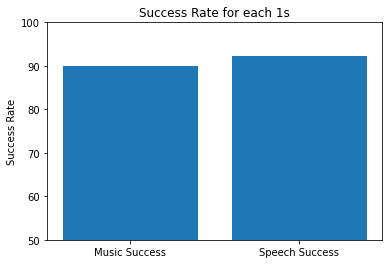

In [20]:
Sxx_speech=Sxx_speech.reshape([513,1293*60])

speech_begin=int(random.randint(0,np.shape(Sxx_speech)[1]*0.9))
speech_end=int(speech_begin+np.shape(Sxx_speech)[1]*0.1)

test_index=np.arange(speech_begin,speech_end, 1)

test_speech=Sxx_speech[:,test_index]
train_speech=np.delete(Sxx_speech, test_index,1)

Sxx_music=Sxx_music.reshape([513,1293*60])

test_music=Sxx_music[:,test_index]
train_music=np.delete(Sxx_music, test_index,1)


test_data=np.concatenate((test_speech, test_music), axis=1)
train_data=np.concatenate((train_speech, train_music), axis=1)

reduced_dim=15
digit_class=2
num_samples=np.shape(train_music)[1]

[W_digits_PCA, mean, Cov]=gaussian_classifier_trainer(train_data,reduced_dim,digit_class,num_samples)

index_for_1s=int(np.round(np.shape(t)[0]/15))
total_1s=int(np.floor(np.shape(test_music)[1]/index_for_1s))

Classification_music=np.zeros([total_1s,1])
Classification_speech=np.zeros([total_1s,1])

for i in range(0,total_1s):
    Classification_music[i]=gaussian_classifier(test_music[:,i*index_for_1s],W_digits_PCA, mean, Cov)
    Classification_speech[i]=gaussian_classifier(test_speech[:,i*index_for_1s],W_digits_PCA, mean, Cov)

Classification_music=(Classification_music==1)*1
Classification_speech=(Classification_speech==0)*1

Success_music=np.sum(Classification_music)/np.shape(Classification_music)[0]
Success_speech=np.sum(Classification_speech)/np.shape(Classification_speech)[0]

Success=np.zeros([2,1])
Success[0]=Success_music*100
Success[1]=Success_speech*100

langs = ['Music Success','Speech Success']
plt.bar(langs,Success[:,0])
plt.ylabel('Success Rate')
plt.title('Success Rate for each 1s')
plt.ylim([50,100])
plt.show()


# Test 2 for Q3 

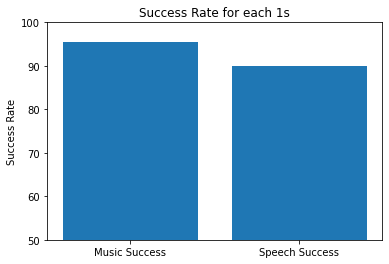

In [21]:
Sxx_speech=Sxx_speech.reshape([513,1293*60])

speech_begin=int(random.randint(0,np.shape(Sxx_speech)[1]*0.9))
speech_end=int(speech_begin+np.shape(Sxx_speech)[1]*0.1)

test_index=np.arange(speech_begin,speech_end, 1)

test_speech=Sxx_speech[:,test_index]
train_speech=np.delete(Sxx_speech, test_index,1)

Sxx_music=Sxx_music.reshape([513,1293*60])

test_music=Sxx_music[:,test_index]
train_music=np.delete(Sxx_music, test_index,1)


test_data=np.concatenate((test_speech, test_music), axis=1)
train_data=np.concatenate((train_speech, train_music), axis=1)

reduced_dim=15
digit_class=2
num_samples=np.shape(train_music)[1]

[W_digits_PCA, mean, Cov]=gaussian_classifier_trainer(train_data,reduced_dim,digit_class,num_samples)

index_for_1s=int(np.round(np.shape(t)[0]/15))
total_1s=int(np.floor(np.shape(test_music)[1]/index_for_1s))

Classification_music=np.zeros([total_1s,1])
Classification_speech=np.zeros([total_1s,1])

for i in range(0,total_1s):
    Classification_music[i]=gaussian_classifier(test_music[:,i*index_for_1s],W_digits_PCA, mean, Cov)
    Classification_speech[i]=gaussian_classifier(test_speech[:,i*index_for_1s],W_digits_PCA, mean, Cov)

Classification_music=(Classification_music==1)*1
Classification_speech=(Classification_speech==0)*1

Success_music=np.sum(Classification_music)/np.shape(Classification_music)[0]
Success_speech=np.sum(Classification_speech)/np.shape(Classification_speech)[0]

Success=np.zeros([2,1])
Success[0]=Success_music*100
Success[1]=Success_speech*100

langs = ['Music Success','Speech Success']
plt.bar(langs,Success[:,0])
plt.ylabel('Success Rate')
plt.title('Success Rate for each 1s')
plt.ylim([50,100])
plt.show()

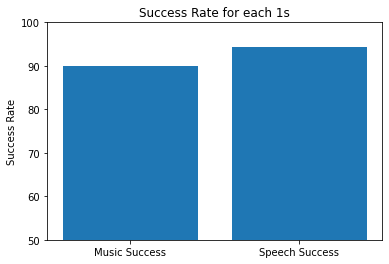

In [22]:
Sxx_speech=Sxx_speech.reshape([513,1293*60])

speech_begin=int(random.randint(0,np.shape(Sxx_speech)[1]*0.9))
speech_end=int(speech_begin+np.shape(Sxx_speech)[1]*0.1)

test_index=np.arange(speech_begin,speech_end, 1)

test_speech=Sxx_speech[:,test_index]
train_speech=np.delete(Sxx_speech, test_index,1)

Sxx_music=Sxx_music.reshape([513,1293*60])

test_music=Sxx_music[:,test_index]
train_music=np.delete(Sxx_music, test_index,1)


test_data=np.concatenate((test_speech, test_music), axis=1)
train_data=np.concatenate((train_speech, train_music), axis=1)

reduced_dim=25
digit_class=2
num_samples=np.shape(train_music)[1]

[W_digits_PCA, mean, Cov]=gaussian_classifier_trainer(train_data,reduced_dim,digit_class,num_samples)

index_for_1s=int(np.round(np.shape(t)[0]/15))
total_1s=int(np.floor(np.shape(test_music)[1]/index_for_1s))

Classification_music=np.zeros([total_1s,1])
Classification_speech=np.zeros([total_1s,1])

for i in range(0,total_1s):
    Classification_music[i]=gaussian_classifier(test_music[:,i*index_for_1s],W_digits_PCA, mean, Cov)
    Classification_speech[i]=gaussian_classifier(test_speech[:,i*index_for_1s],W_digits_PCA, mean, Cov)

Classification_music=(Classification_music==1)*1
Classification_speech=(Classification_speech==0)*1

Success_music=np.sum(Classification_music)/np.shape(Classification_music)[0]
Success_speech=np.sum(Classification_speech)/np.shape(Classification_speech)[0]

Success=np.zeros([2,1])
Success[0]=Success_music*100
Success[1]=Success_speech*100

langs = ['Music Success','Speech Success']
plt.bar(langs,Success[:,0])
plt.ylabel('Success Rate')
plt.title('Success Rate for each 1s')
plt.ylim([50,100])
plt.show()

Similar to the Q2, we observe that increasing the number of dimensions significantly changes the output success rate. Additional to the Q2, here the initial training data selection plays an important role for the future success of the classifier (as it can be seen by the success rates). I think that is due to the similarities between speech and music when it comes to bad examples.

# Problem 3 My voice & My music

In [23]:
root_path = 'C:/Users/Ogulcan/Desktop/CS 545/Homeworks/HW_3' # Change current path to the desired one
subject_name = 'vl1'
full_path = '%s' % (root_path)
os.chdir(root_path)
    
window_size=1024
my_voice_Sxx=np.zeros([513, 1293,60])
my_music_Sxx=np.zeros([513, 1293,60])


file='my_voice.wav'
fs_m, audio_m = scipy.io.wavfile.read(file)
my_voice=audio_m.astype(float)
f, t, Sxx = stft(my_voice, fs_m,window=('hamming'),nperseg=window_size,noverlap=window_size*3/4)
my_voice_Sxx=10*np.log10(abs(Sxx)/np.max(abs(Sxx)))

file='my_music.wav'
fs_m, audio_m = scipy.io.wavfile.read(file)
my_music=audio_m.astype(float)
f, t, Sxx = stft(my_music, fs_m,window=('hamming'),nperseg=window_size,noverlap=window_size*3/4)
my_music_Sxx=10*np.log10(abs(Sxx)/np.max(abs(Sxx)))

my_voice_Sxx=my_voice_Sxx[:,0:np.shape(my_music_Sxx)[1]]

In [24]:
Sxx_speech=Sxx_speech.reshape([513,1293*60])

speech_begin=int(random.randint(0,np.shape(Sxx_speech)[1]*0.9))
speech_end=int(speech_begin+np.shape(Sxx_speech)[1]*0.1)

test_index=np.arange(speech_begin,speech_end, 1)

test_speech=Sxx_speech[:,test_index]
train_speech=np.delete(Sxx_speech, test_index,1)

Sxx_music=Sxx_music.reshape([513,1293*60])

test_music=Sxx_music[:,test_index]
train_music=np.delete(Sxx_music, test_index,1)


test_data=np.concatenate((test_speech, test_music), axis=1)
train_data=np.concatenate((train_speech, train_music), axis=1)

reduced_dim=25
digit_class=2
num_samples=np.shape(train_music)[1]

[W_digits_PCA, mean, Cov]=gaussian_classifier_trainer(train_data,reduced_dim,digit_class,num_samples)

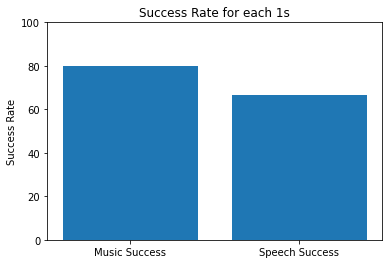

In [25]:
index_for_1s=int(np.round(np.shape(t)[0]/15))
total_1s=int(np.floor(np.shape(my_music_Sxx)[1]/index_for_1s))

Classification_music=np.zeros([total_1s,1])
Classification_speech=np.zeros([total_1s,1])

for i in range(0,total_1s):
    Classification_music[i]=gaussian_classifier(my_music_Sxx[:,i*index_for_1s],W_digits_PCA, mean, Cov)
    Classification_speech[i]=gaussian_classifier(my_voice_Sxx[:,i*index_for_1s],W_digits_PCA, mean, Cov)

Classification_music=(Classification_music==1)*1
Classification_speech=(Classification_speech==0)*1

Success_music=np.sum(Classification_music)/np.shape(Classification_music)[0]
Success_speech=np.sum(Classification_speech)/np.shape(Classification_speech)[0]

Success=np.zeros([2,1])
Success[0]=Success_music*100
Success[1]=Success_speech*100

langs = ['Music Success','Speech Success']
plt.bar(langs,Success[:,0])
plt.ylabel('Success Rate')
plt.title('Success Rate for each 1s')
plt.ylim([0,100])
plt.show()

We observe that the success rate reduced significantly due to the bad training examples when compared with the input data. If I have chosen a different input data set, the results would be really different indicating that the performance of this classifier (like every classifier) depends on the training data. Also, the performance improves as we increase the feature dimension.

# Question 4

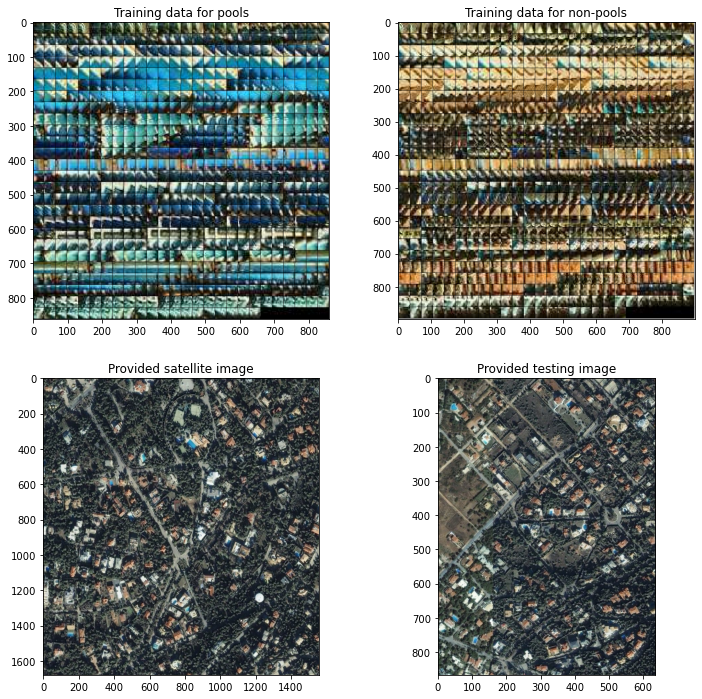

In [26]:
root_path = 'C:/Users/Ogulcan/Desktop/CS 545/Homeworks/HW_3' # Change current path to the desired one
subject_name = 'vl1'
full_path = '%s' % (root_path)
os.chdir(root_path)

def gauss_classifier(X):
        N = X.shape[1]
        # get mean and covariances of data
        Mean = np.mean(X,axis=1,keepdims=True)
        Cov = (X-Mean).dot((X-Mean).T)
        Cov /= (N-1)
        # return both of them as a dict 
        g_dict = {'mean':Mean, 'cov':Cov}
        return g_dict


def PCA(X,n): 
    X_2 = X - np.mean(X,axis=1,keepdims=True)                        # removed the mean
    COV = (X_2.dot(X_2.T))/(X_2.shape[1]-1)                          # computed the covariance matrix  
    eigenvalues, eigenvecs = scipy.sparse.linalg.eigsh(COV,k=n)      # Got the eigenvectors and eigenvalues
    W = np.diag(1./(np.sqrt(eigenvalues))).dot(eigenvecs.T)          
    return W


pools = Image.open("pools.png")
not_pools = Image.open("not_pools.png")
mixed = Image.open("ekalismall.png")
testing = Image.open("ekalismall2.png")

mixed_pool = mixed.resize((np.shape(mixed)[0]*2,np.shape(mixed)[1]*2 ))

fig, axs = plt.subplots(2, 2)

axs[0, 0].imshow(pools)
axs[0, 0].set_title('Training data for pools')
axs[0, 1].imshow(not_pools)
axs[0, 1].set_title('Training data for non-pools')
axs[1, 0].imshow(mixed_pool)
axs[1, 0].set_title('Provided satellite image')
axs[1, 1].imshow(testing)
axs[1, 1].set_title('Provided testing image')

fig.set_figheight(12)
fig.set_figwidth(12)

Here I will be using two different training data to show their effect on the classification

In [27]:
# Select the regions with pool and patch them for the training

image_x = 840
image_y = 840

scaler=4
training_image_x = 840*scaler
training_image_y = 840*scaler

full_image = image_x * image_y
rgb = 3
real_dim = (image_x,image_y,rgb)
X_train = []
Y_train = []
X_test = []
im_row = []
im_col = []
pool_mean = None
pool_cov = None
notpool_mean = None
notpool_cov = None

pca_dims = 28
outer = 3 
im_dims = 30 # Sliding windows size
extra_notpool = 21
#blue_const = [1,1.009,1.1]

mixed = np.array(mixed.resize((image_x,image_y)))[:,:,:rgb]
testing = np.array(testing.resize((image_x,image_y)))[:,:,:rgb]
mixed_pool=np.array(mixed_pool.resize((training_image_x,training_image_y)))[:,:,:rgb]


In [28]:
# Generating examples for the pools


ind_x_s=int(340*scaler/2)
ind_x_e=int(410*scaler/2)

ind_y_s=int(870*scaler/2)
ind_y_e=int(930*scaler/2)



patches_1 = extract_patches_2d(mixed_pool[ind_x_s:ind_x_e,ind_y_s:ind_y_e,:], patch_size=(30, 30), max_patches=98)

ind_x_s=int(430*scaler/2)
ind_x_e=int(480*scaler/2)

ind_y_s=int(600*scaler/2)
ind_y_e=int(640*scaler/2)



patches_2 = extract_patches_2d(mixed_pool[ind_x_s:ind_x_e,ind_y_s:ind_y_e,:], patch_size=(30, 30), max_patches=98)

ind_x_s=int(1430*scaler/2)
ind_x_e=int(1480*scaler/2)

ind_y_s=int(130*scaler/2)
ind_y_e=int(190*scaler/2)



patches_3 = extract_patches_2d(mixed_pool[ind_x_s:ind_x_e,ind_y_s:ind_y_e,:], patch_size=(30, 30), max_patches=98)

ind_x_s=int(910*scaler/2)
ind_x_e=int(970*scaler/2)

ind_y_s=int(1110*scaler/2)
ind_y_e=int(1150*scaler/2)



patches_4 = extract_patches_2d(mixed_pool[ind_x_s:ind_x_e,ind_y_s:ind_y_e,:], patch_size=(30, 30), max_patches=98)

ind_x_s=int(300*scaler/2)
ind_x_e=int(340*scaler/2)

ind_y_s=int(1270*scaler/2)
ind_y_e=int(1310*scaler/2)



patches_5 = extract_patches_2d(mixed_pool[ind_x_s:ind_x_e,ind_y_s:ind_y_e,:], patch_size=(30, 30), max_patches=98)


ind_x_s=int(1245*scaler/2)
ind_x_e=int(1275*scaler/2)

ind_y_s=int(780*scaler/2)
ind_y_e=int(820*scaler/2)



patches_6 = extract_patches_2d(mixed_pool[ind_x_s:ind_x_e,ind_y_s:ind_y_e,:], patch_size=(30, 30), max_patches=98)

ind_x_s=int(1275*scaler/2)
ind_x_e=int(1325*scaler/2)

ind_y_s=int(850*scaler/2)
ind_y_e=int(900*scaler/2)



patches_7 = extract_patches_2d(mixed_pool[ind_x_s:ind_x_e,ind_y_s:ind_y_e,:], patch_size=(30, 30), max_patches=98)

ind_x_s=int(1050*scaler/2)
ind_x_e=int(1100*scaler/2)

ind_y_s=int(0*scaler/2)
ind_y_e=int(40*scaler/2)


patches_8 = extract_patches_2d(mixed_pool[ind_x_s:ind_x_e,ind_y_s:ind_y_e,:], patch_size=(30, 30), max_patches=98)


#fig.set_figheight(12)
#fig.set_figwidth(12)

patches_pool=np.concatenate((patches_1,patches_2,patches_3,patches_4,patches_5,patches_6,patches_7,patches_8),axis=0)



In [29]:
# Select the regions without pool and patch them for the training

#fig, axs = plt.subplots(1,1)

ind_x_s=int(0*scaler/2)
ind_x_e=int(500*scaler/2)

ind_y_s=int(0*scaler/2)
ind_y_e=int(500*scaler/2)

#axs.imshow(mixed_pool[ind_x_s:ind_x_e,ind_y_s:ind_y_e,:])
patches_1 = extract_patches_2d(mixed_pool[ind_x_s:ind_x_e,ind_y_s:ind_y_e,:], patch_size=(30, 30), max_patches=98*2)

ind_x_s=int(1400*scaler/2)
ind_x_e=int(1600*scaler/2)

ind_y_s=int(1400*scaler/2)
ind_y_e=int(1600*scaler/2)

#axs.imshow(mixed_pool[ind_x_s:ind_x_e,ind_y_s:ind_y_e,:])

patches_2 = extract_patches_2d(mixed_pool[ind_x_s:ind_x_e,ind_y_s:ind_y_e,:], patch_size=(30, 30), max_patches=98*2)

ind_x_s=int(1000*scaler/2)
ind_x_e=int(1200*scaler/2)

ind_y_s=int(600*scaler/2)
ind_y_e=int(900*scaler/2)

#axs.imshow(mixed_pool[ind_x_s:ind_x_e,ind_y_s:ind_y_e,:])

patches_3 = extract_patches_2d(mixed_pool[ind_x_s:ind_x_e,ind_y_s:ind_y_e,:], patch_size=(30, 30), max_patches=98*2)

ind_x_s=int(600*scaler/2)
ind_x_e=int(800*scaler/2)

ind_y_s=int(1400*scaler/2)
ind_y_e=int(1600*scaler/2)

#axs.imshow(mixed_pool[ind_x_s:ind_x_e,ind_y_s:ind_y_e,:])

#axs.imshow(mixed_pool[:,:,:])

patches_4 = extract_patches_2d(mixed_pool[ind_x_s:ind_x_e,ind_y_s:ind_y_e,:], patch_size=(30, 30), max_patches=98*2)

patches_without_pool=np.concatenate((patches_1,patches_2,patches_3,patches_4),axis=0)


#fig.set_figheight(12)
#fig.set_figwidth(12)

#np.shape(patches_without_pool)


In [30]:
# Save the patches

plot_width, plot_height = 840, 840

root_path = 'C:/Users/Ogulcan/Desktop/CS 545/Homeworks/HW_3/patch/pools' # Change current path to the desired one
subject_name = 'vl1'
full_path = '%s' % (root_path)
os.chdir(root_path)

for i, patch in enumerate(patches_pool):
    im = Image.fromarray(patch, 'RGB')
    im.save('pool_patch%d.png' % (i,))
    
    
root_path = 'C:/Users/Ogulcan/Desktop/CS 545/Homeworks/HW_3/patch/not_pools' # Change current path to the desired one
subject_name = 'vl1'
full_path = '%s' % (root_path)
os.chdir(root_path)

for i, patch in enumerate(patches_without_pool):
    im = Image.fromarray(patch, 'RGB')
    im.save('no_pool_patch%d.png' % (i,))

 

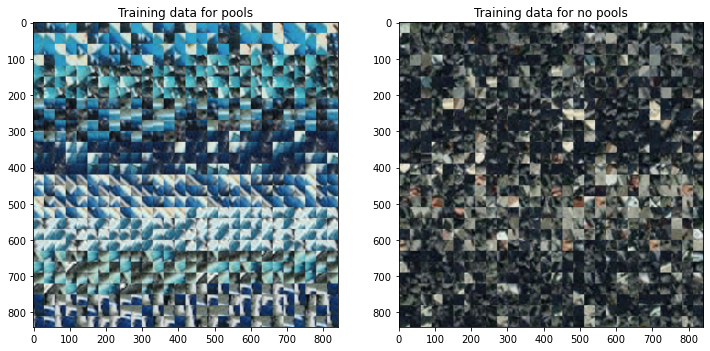

In [31]:
pool_trainer=np.zeros([840,840,3])
row_block=int(840/30)

index=0
for i in range(row_block):
    for j in range(row_block):
            pool_trainer[30*i:30*(i+1),30*j:30*(j+1),:]=patches_pool[index,:,:,:]
            index=index+1

no_pool_trainer=np.zeros([840,840,3])
row_block=int(840/30)

index=0
for i in range(row_block):
    for j in range(row_block):
            no_pool_trainer[30*i:30*(i+1),30*j:30*(j+1),:]=patches_without_pool[index,:,:,:]
            index=index+1

root_path = 'C:/Users/Ogulcan/Desktop/CS 545/Homeworks/HW_3' # Change current path to the desired one
subject_name = 'vl1'
full_path = '%s' % (root_path)
os.chdir(root_path)

pool_trainer = pool_trainer.astype(np.uint8)
im = Image.fromarray(pool_trainer, 'RGB')
im.save('pools_v2.png')




no_pool_trainer = no_pool_trainer.astype(np.uint8)
im = Image.fromarray(no_pool_trainer, 'RGB')
im.save('not_pools_v2.png')

fig, axs = plt.subplots(1, 2)
axs[0].imshow(pool_trainer)
axs[0].set_title('Training data for pools')
axs[1].imshow(no_pool_trainer)
axs[1].set_title('Training data for no pools')
fig.set_figheight(12)
fig.set_figwidth(12)



# REAL CODE STARTS HERE (ABOVE IS JUST SAMPLE GENERATION)

# Training Set I

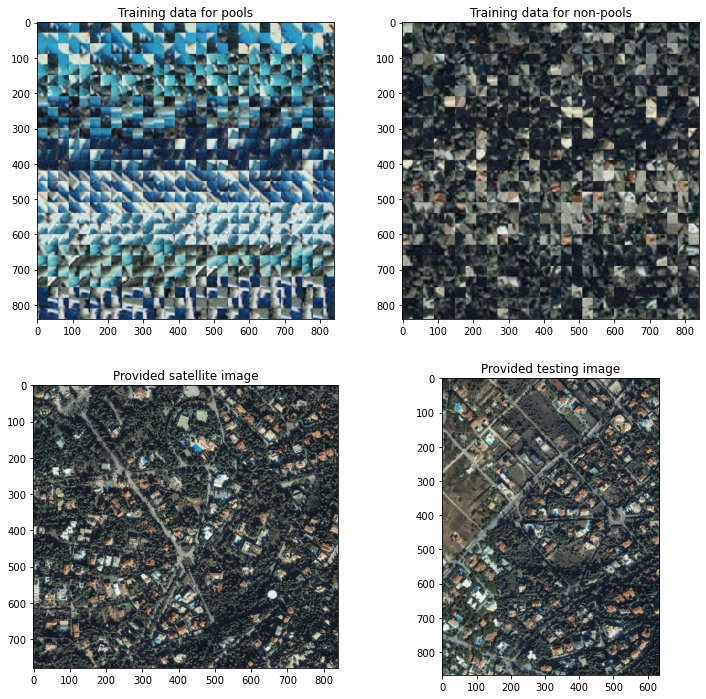

In [32]:
pools = Image.open("pools_v2.png")
not_pools = Image.open("not_pools_v2.png")
mixed = Image.open("ekalismall.png")
testing = Image.open("ekalismall2.png")

fig, axs = plt.subplots(2, 2)

axs[0, 0].imshow(pools)
axs[0, 0].set_title('Training data for pools')
axs[0, 1].imshow(not_pools)
axs[0, 1].set_title('Training data for non-pools')
axs[1, 0].imshow(mixed)
axs[1, 0].set_title('Provided satellite image')
axs[1, 1].imshow(testing)
axs[1, 1].set_title('Provided testing image')

fig.set_figheight(12)
fig.set_figwidth(12)

# Training Set II

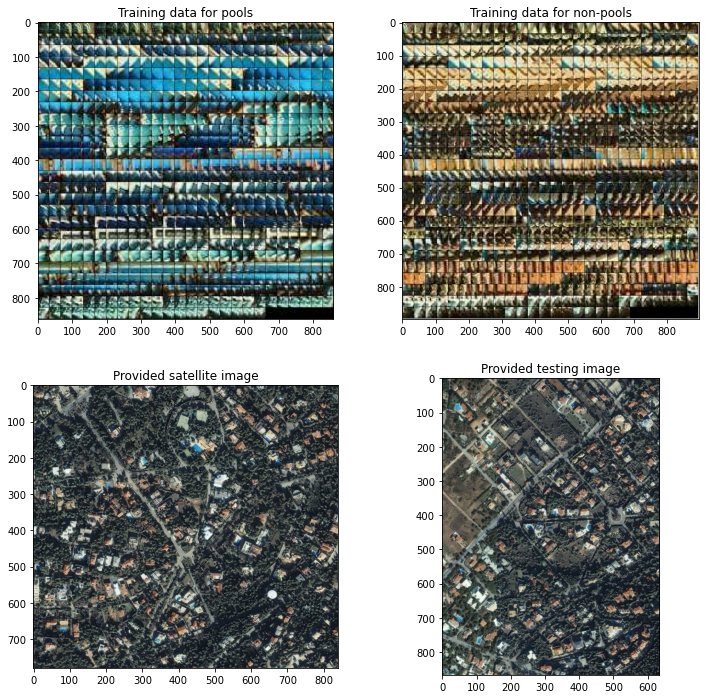

In [33]:
pools = Image.open("pools.png")
not_pools = Image.open("not_pools.png")
mixed = Image.open("ekalismall.png")
testing = Image.open("ekalismall2.png")

fig, axs = plt.subplots(2, 2)

axs[0, 0].imshow(pools)
axs[0, 0].set_title('Training data for pools')
axs[0, 1].imshow(not_pools)
axs[0, 1].set_title('Training data for non-pools')
axs[1, 0].imshow(mixed)
axs[1, 0].set_title('Provided satellite image')
axs[1, 1].imshow(testing)
axs[1, 1].set_title('Provided testing image')

fig.set_figheight(12)
fig.set_figwidth(12)

# Moving with the set I

In [34]:
# Defining some numbers and necessary lists/arrays
image_x = 840
image_y = 840
full_image = image_x * image_y
rgb = 3

X_train = []
Y_train = []
X_test = []
im_row = []
im_col = []

real_dim = (image_x,image_y,rgb)

pca_dims = 28
outer = 0
im_dims = 28
extra_notpool = 21

pools = Image.open("pools_v2.png")
not_pools = Image.open("not_pools_v2.png")
mixed = Image.open("ekalismall.png")
testing = Image.open("ekalismall2.png")

pools = np.array(pools.resize((image_x,image_y)))[:,:,:rgb]
not_pools = np.array(not_pools.resize((image_x,image_y)))[:,:,:rgb]
mixed = np.array(mixed.resize((image_x,image_y)))[:,:,:rgb]
testing = np.array(testing.resize((image_x,image_y)))[:,:,:rgb]

result = testing.copy()
pools_size = int(pools.shape[1] / im_dims)
img_dim = int(image_x / im_dims)
blue = np.ones((pools_size,rgb))


max_pool = image_y - pools_size
max_pool2 = image_x - pools_size
max_npool = image_y - img_dim
max_npool2 = image_x - img_dim
row_npool = 0
row_pool = 0
col_pool = 0
col_npool = 0

# Preparing the training samples for pools

for i in range(0, max_pool, pools_size):
    row_pool += 1
    for j in range(0, max_pool2, pools_size):
        col_pool += 1
        Y_train.append(1)
        row_st = i+outer
        row_end = i+pools_size-outer
        col_st = j+outer
        col_end = j+pools_size-outer
        X_train.append(pools[row_st:row_end, col_st:col_end])
        
np.shape(X_train)

# Preparing the training samples for no pools

for i in range(0, max_npool, img_dim):
    row_npool += 1
    for j in range(0, max_npool2, img_dim):
        col_npool +=1
        Y_train.append(0)
        row_st = i+outer
        row_end = i+img_dim-outer
        col_st = j+outer
        col_end = j+img_dim-outer
        X_train.append(not_pools[row_st:row_end, col_st:col_end])
        
np.shape(X_train)

row_ex = 0
col_ex = 0

# We are using the initial image one more time since our results were horrible

for i in range(extra_notpool):
    row_ex +=1
    for j in range(max_npool2):
        col_ex +=1
        Y_train.append(0)
        row_st = i+outer
        row_end = i+img_dim-outer
        col_st = j+outer
        col_end = j+img_dim-outer
        X_train.append(mixed[row_st:row_end, col_st:col_end])
 

X_train = np.array(X_train)
Y_train = np.array(Y_train)
#image_ex = row_ex + col_ex
full_size = (X_train.shape[0], X_train.shape[1] * X_train.shape[2] * X_train.shape[rgb])

image_pool =  col_pool
image_npool = col_npool
X_train = np.reshape(X_train, full_size).T

np.shape(X_train)

# Preparing the test samples

for i in range(0, testing.shape[0] - img_dim, 2):
    for j in range(0, testing.shape[1] - img_dim, 2):
        im_row.append(i)
        im_col.append(j) 
        row_st = i+outer
        row_end = i+img_dim-outer
        col_st = j+outer
        col_end = j+img_dim-outer
        img = testing[row_st:row_end, col_st:col_end]
        img = np.reshape(img, (img.shape[0] * img.shape[1] * img.shape[2]))
        X_test.append(img)

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[1], X_test.shape[0]))
test = image_pool + image_npool
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[1], X_test.shape[0]))



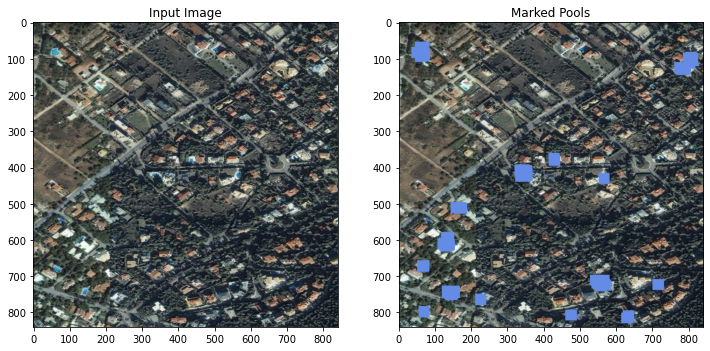

In [35]:
# Training the samples

W_train = PCA(X_train, pca_dims)
Z_train = W_train.dot(X_train - np.mean(X_train,axis=1,keepdims=True))

notpool_data = Z_train[:,Y_train == 0]
pool_data = Z_train[:,Y_train == 1]

gauss_pool = gauss_classifier(pool_data)
gauss_notpool = gauss_classifier(notpool_data)

# Generating decisions

def probs(X,g):
    M = X.shape[0]
    X_2 = X - g['mean']
    IC =(g['cov'])
    probs = (-1*np.log(np.linalg.det(IC)) + M*np.log(2*np.pi) + np.sum((IC).dot(X_2)*X_2,axis=0))*(-1/2)
    return probs

Z_test = W_train.dot((X_test - np.mean(X_test, axis = 1, keepdims = True)).T)


pool_probs = probs(Z_test, gauss_pool)
notpool_probs = probs(Z_test, gauss_notpool)
pred = (pool_probs > notpool_probs*1.1).astype(int)
im_row = np.array(im_row)
im_col = np.array(im_col)

pred = (pool_probs > notpool_probs*1.1).astype(int)
pools_idx = np.where(pred==1)
pred = pred[pools_idx]
len_pool = len(pred)

im_row = im_row[pools_idx]
im_col = im_col[pools_idx]

def draw_pools(pred,im_row,im_col,blue,result,im_size): 
    for k in range(len_pool):
        blue[:, 0] = 100
        blue[:, 1] = 140
        blue[:, 2] = 231
        i = im_row[k]
        j = im_col[k]
        result[i:im_row[k]+im_size, j:im_col[k]+im_size] = blue
    return result
    
    
    
result=draw_pools(pred,im_row,im_col,blue,result,img_dim)

fig, axs = plt.subplots(1, 2)

axs[0].imshow(testing)
axs[0].set_title('Input Image')
axs[1].imshow(result)
axs[1].set_title('Marked Pools')

fig.set_figheight(12)
fig.set_figwidth(12)

We see that our classifier is successfull while realizing some pools however there are still missing ones due to the classifier (gaussian) and the training data. Also there are lots of wrong classification in the left image. This is a sign that image problems are relatively complicated (in terms of the representation of the data), so we need nonlinear classifier.

# Training Set II

In [36]:
# Defining some numbers and necessary lists/arrays
image_x = 840
image_y = 840
full_image = image_x * image_y
rgb = 3
real_dim = (image_x,image_y,rgb)
X_train = []
Y_train = []
X_test = []
im_row = []
im_col = []
pool_mean = None
pool_cov = None
notpool_mean = None
notpool_cov = None

pca_dims = 28
outer = 3
im_dims = 26
extra_notpool = 21

pools = Image.open("pools.png")
not_pools = Image.open("not_pools.png")
mixed = Image.open("ekalismall.png")
testing = Image.open("ekalismall2.png")

pools = np.array(pools.resize((image_x,image_y)))[:,:,:rgb]
not_pools = np.array(not_pools.resize((image_x,image_y)))[:,:,:rgb]
mixed = np.array(mixed.resize((image_x,image_y)))[:,:,:rgb]
testing = np.array(testing.resize((image_x,image_y)))[:,:,:rgb]

def clipper(X):
    X = X[:-6]
    return X


result = testing.copy()
pools_size = int(pools.shape[1] / im_dims)
img_dim = int(image_x / im_dims)
blue = np.ones((pools_size,rgb))
max_pool = image_y - pools_size
max_pool2 = image_x - pools_size
max_npool = image_y - img_dim
max_npool2 = image_x - img_dim
row_npool = 0
row_pool = 0
col_pool = 0
col_npool = 0

# Preparing the training samples for pools

for i in range(0, max_pool, pools_size):
    row_pool += 1
    for j in range(0, max_pool2, pools_size):
        col_pool += 1
        Y_train.append(1)
        row_st = i+outer
        row_end = i+pools_size-outer
        col_st = j+outer
        col_end = j+pools_size-outer
        X_train.append(pools[row_st:row_end, col_st:col_end])
#print(row_pool)
#print(col_pool)
X_train = clipper(X_train)
Y_train = clipper(Y_train)

# Preparing the training samples for no pools

for i in range(0, max_npool, img_dim):
    row_npool += 1
    for j in range(0, max_npool2, img_dim):
        col_npool +=1
        Y_train.append(0)
        row_st = i+outer
        row_end = i+img_dim-outer
        col_st = j+outer
        col_end = j+img_dim-outer
        X_train.append(not_pools[row_st:row_end, col_st:col_end])
#print(row_npool)
#print(col_npool)
X_train = clipper(X_train)
Y_train = clipper(Y_train)


row_ex = 0
col_ex = 0
for i in range(extra_notpool):
    row_ex +=1
    for j in range(max_npool2):
        col_ex +=1
        Y_train.append(0)
        row_st = i+outer
        row_end = i+img_dim-outer
        col_st = j+outer
        col_end = j+img_dim-outer
        X_train.append(mixed[row_st:row_end, col_st:col_end])
#print(row_ex)
#print(col_ex)  


X_train = np.array(X_train)
Y_train = np.array(Y_train)
image_ex = row_ex + col_ex
full_size = (X_train.shape[0], X_train.shape[1] * X_train.shape[2] * X_train.shape[rgb])
image_pool = row_pool + col_pool
image_npool = row_npool + col_npool
X_train = np.reshape(X_train, full_size).T

# Preparing the test samples

for i in range(0, testing.shape[0] - img_dim, 2):
    for j in range(0, testing.shape[1] - img_dim, 2):
        im_row.append(i)
        im_col.append(j) 
        row_st = i+outer
        row_end = i+img_dim-outer
        col_st = j+outer
        col_end = j+img_dim-outer
        img = testing[row_st:row_end, col_st:col_end]
        img = np.reshape(img, (img.shape[0] * img.shape[1] * img.shape[2]))
        X_test.append(img)
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[1], X_test.shape[0]))
test = image_pool + image_npool
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[1], X_test.shape[0]))

# Training the samples

W_train = PCA(X_train, pca_dims)
Z_train = W_train.dot(X_train - np.mean(X_train,axis=1,keepdims=True))

notpool_data = Z_train[:,Y_train == 0]
pool_data = Z_train[:,Y_train == 1]

gauss_pool = gauss_classifier(pool_data)
gauss_notpool = gauss_classifier(notpool_data)

# Generating decisions

def probs(X,g):
    M = X.shape[0]
    X_2 = X - g['mean']
    IC =(g['cov'])
    probs = (-1*np.log(np.linalg.det(IC)) + M*np.log(2*np.pi) + np.sum((IC).dot(X_2)*X_2,axis=0))*(-1/2)
    return probs

Z_test = W_train.dot((X_test - np.mean(X_test, axis = 1, keepdims = True)).T)

pool_probs = probs(Z_test, gauss_pool)
notpool_probs = probs(Z_test, gauss_notpool)
pred = (pool_probs > notpool_probs*1.05).astype(int)
im_row = np.array(im_row)
im_col = np.array(im_col)

pred = (pool_probs > notpool_probs*1.05).astype(int)
pools_idx = np.where(pred==1)
pred = pred[pools_idx]
len_pool = len(pred)

im_row = im_row[pools_idx]
im_col = im_col[pools_idx]

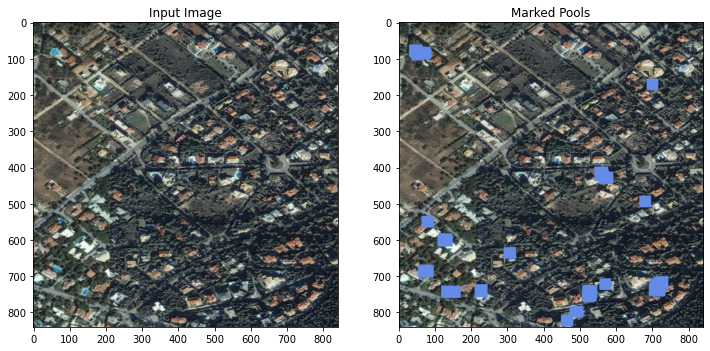

In [37]:
def draw_pools(pred,im_row,im_col,blue,result,im_size): 
    for k in range(len_pool):
        blue[:, 0] = 100
        blue[:, 1] = 140
        blue[:, 2] = 231
        i = im_row[k]
        j = im_col[k]
        result[i:im_row[k]+im_size, j:im_col[k]+im_size] = blue
    return result
    
    
    
result=draw_pools(pred,im_row,im_col,blue,result,img_dim)

fig, axs = plt.subplots(1, 2)

axs[0].imshow(testing)
axs[0].set_title('Input Image')
axs[1].imshow(result)
axs[1].set_title('Marked Pools')

fig.set_figheight(12)
fig.set_figwidth(12)

From both runs, we observe that the first training data set performed better when compared with the second one and this indicates that our classifier prone to error (high dependency to the training data). We can solve this problem by using a non-linear classifier rather than using a gaussian one. Also, we can choose an even better data set to improve this result. I believe choosing a non-linear classifier is an better choice.